## Практикуемся решать задачу регрессии!

### Будем предсказывать цену дома 📝

ВАЖНО: При построении графиков не забывайте указать название графика и обозначить, что изображено по каждой из осей

В блоке ниже импортируйте все библиотеки, которые вам понадобятся для запуска ноутбука

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn import linear_model
from sklearn.linear_model import LassoCV 
# some lib

**Скачайте необходимые данные по ссылке: https://www.kaggle.com/c/house-prices-advanced-regression-techniques**

In [2]:
data = pd.read_csv('train.csv', header=0)

✅ Посмотрите, как выглядят данные, и приступайте к анализу

In [3]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


✅ Если в данных бессмысленные столбцы? Если да, избавьтесь от них и объясните, почему так поступили.

In [4]:
data = data.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)

# Id повторяет id фрейма в pandas, другие столбцы содержат слишком много NaN-значений. 

✅ Есть ли в данных пропуски? Если да, то для каждого столбца, в котором они имеются, посчитайте их количество и их долю от общего числа значений. Что вы наблюдаете?

In [5]:
data.isnull().any().any()

True

In [6]:
nulls = []
for col in data:
    if data[col].isnull().sum() > 0:
        print(col, ":", data[col].dtypes)
        nulls.append(col)

LotFrontage : float64
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinType2 : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object


In [7]:
for i in nulls:
    print(data[nulls].isnull().sum(), data[nulls].isnull().sum()/len(data))

LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64 LotFrontage     0.177397
MasVnrType      0.597260
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64
LotFrontage     259
MasVnrType      872
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       

В большинстве столбцов пропущена незначительная доля значений, но в трех столбцах доля пропусков составляет от 15 до 59 процентов

✅ Избавьтесь от пропусков. Для каждого из примененных методов обоснуйте свое решение. 

In [8]:
del(nulls)

In [9]:
data.isnull().sum().any()

True

In [10]:
nulls = data.isnull().sum()
nulls = nulls[nulls>0]
nulls[1]
del(nulls)
nulls = []

In [11]:
for col in data:
    if data[col].isnull().sum() > 0:
        print(col, ":", data[col].dtypes)
        nulls.append(col)

LotFrontage : float64
MasVnrType : object
MasVnrArea : float64
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinType2 : object
Electrical : object
FireplaceQu : object
GarageType : object
GarageYrBlt : float64
GarageFinish : object
GarageQual : object
GarageCond : object


In [12]:
nfloats = data[nulls].select_dtypes('float')
nobjects = data[nulls].select_dtypes('object')

In [13]:
nobjects

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA
1,NaN,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
2,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
3,NaN,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA
4,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA
...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA
1456,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA
1457,NaN,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA
1458,NaN,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA


In [14]:
nobjects.mode()

,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond
0,BrkFace,TA,TA,No,Unf,Unf,SBrkr,Gd,Attchd,Unf,TA,TA


In [15]:
nfloats = nfloats.fillna(nfloats.mean())
nfloats.isnull().any()

LotFrontage    False
MasVnrArea     False
GarageYrBlt    False
dtype: bool

Для численных значений пропуски можно заменить средним арифметическим столбца

In [16]:
nobjects = nobjects.fillna(nobjects.apply(lambda x : x.mode()[0]))
nobjects.isnull().any()

MasVnrType      False
BsmtQual        False
BsmtCond        False
BsmtExposure    False
BsmtFinType1    False
BsmtFinType2    False
Electrical      False
FireplaceQu     False
GarageType      False
GarageFinish    False
GarageQual      False
GarageCond      False
dtype: bool

Пропуски категориальных значений лучше заменить на значения из набора, в котором значение выбирается с вероятностью, равной его доле, но большой ошибкой не будет замена на самое частое значение столбца

✅ Проверьте, что вы действительно избавились от пропусков

In [17]:
data = data.drop(nulls, axis=1)
data

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,112,0,0,0,0,4,2010,WD,Normal,142125


Присоединение данных, содержавших нули, к датасету:

In [18]:
for i in nfloats:
    data[i[0]] = i[1::]

In [19]:
for i in nobjects:
    data[i[0]] = i[1::]

In [20]:
data.isnull().any().any()

False

Пропусков нет

✅ Обработайте категориальные признаки. Объясните выбор метода (one-hot-encoding, label encoding, ...)

Label encoding по умолчанию является менее желательным для кодирования методом из-за создания лишних зависимостей в данных, поэтому сначала лучше выбрать OHE

In [21]:
ohe = OneHotEncoder(sparse = True, drop = 'first')
categorical = data.select_dtypes('object')

In [22]:
categorical_names = data.select_dtypes('object').columns.values

In [23]:
ohe.fit(categorical)

c:\Users\kayle\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', sparse=True)

In [24]:
codes = ohe.transform(categorical).toarray()

In [25]:
codes.shape

(1460, 155)

In [26]:
feature_names = ohe.get_feature_names_out(categorical_names)

In [27]:
feature_names

array(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl',
       'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod',
       'LandSlope_Sev', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'Cond

In [28]:
data_coded = pd.concat([data.select_dtypes(exclude='object'),
                pd.DataFrame(codes, columns=feature_names).astype(int)], axis =1)

In [29]:
data_coded

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,0,0,0,1,0,0,0,1,0
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,0,0,0,0,1,0,0,0,1,0
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,0,0,0,1,0,0,0,1,0
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,0,0,0,0,1,0,0,0,1,0


✅ Вычислите и визуализируйте попарную корреляцию Пирсона между всеми признаками. Какие выводы можно сделать?

Поскольку признаков слишком много (189), отбросим столбцы, бывшие категориальными и вычислим корреляцию только для вещесвтенных признаков:

In [30]:
nums = data.select_dtypes(['int', 'float'])

nums

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,8450,7,5,2003,2003,706,0,150,856,...,0,61,0,0,0,0,0,2,2008,208500
1,20,9600,6,8,1976,1976,978,0,284,1262,...,298,0,0,0,0,0,0,5,2007,181500
2,60,11250,7,5,2001,2002,486,0,434,920,...,0,42,0,0,0,0,0,9,2008,223500
3,70,9550,7,5,1915,1970,216,0,540,756,...,0,35,272,0,0,0,0,2,2006,140000
4,60,14260,8,5,2000,2000,655,0,490,1145,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,366,0,112,0,0,0,0,4,2010,142125


<Axes: >

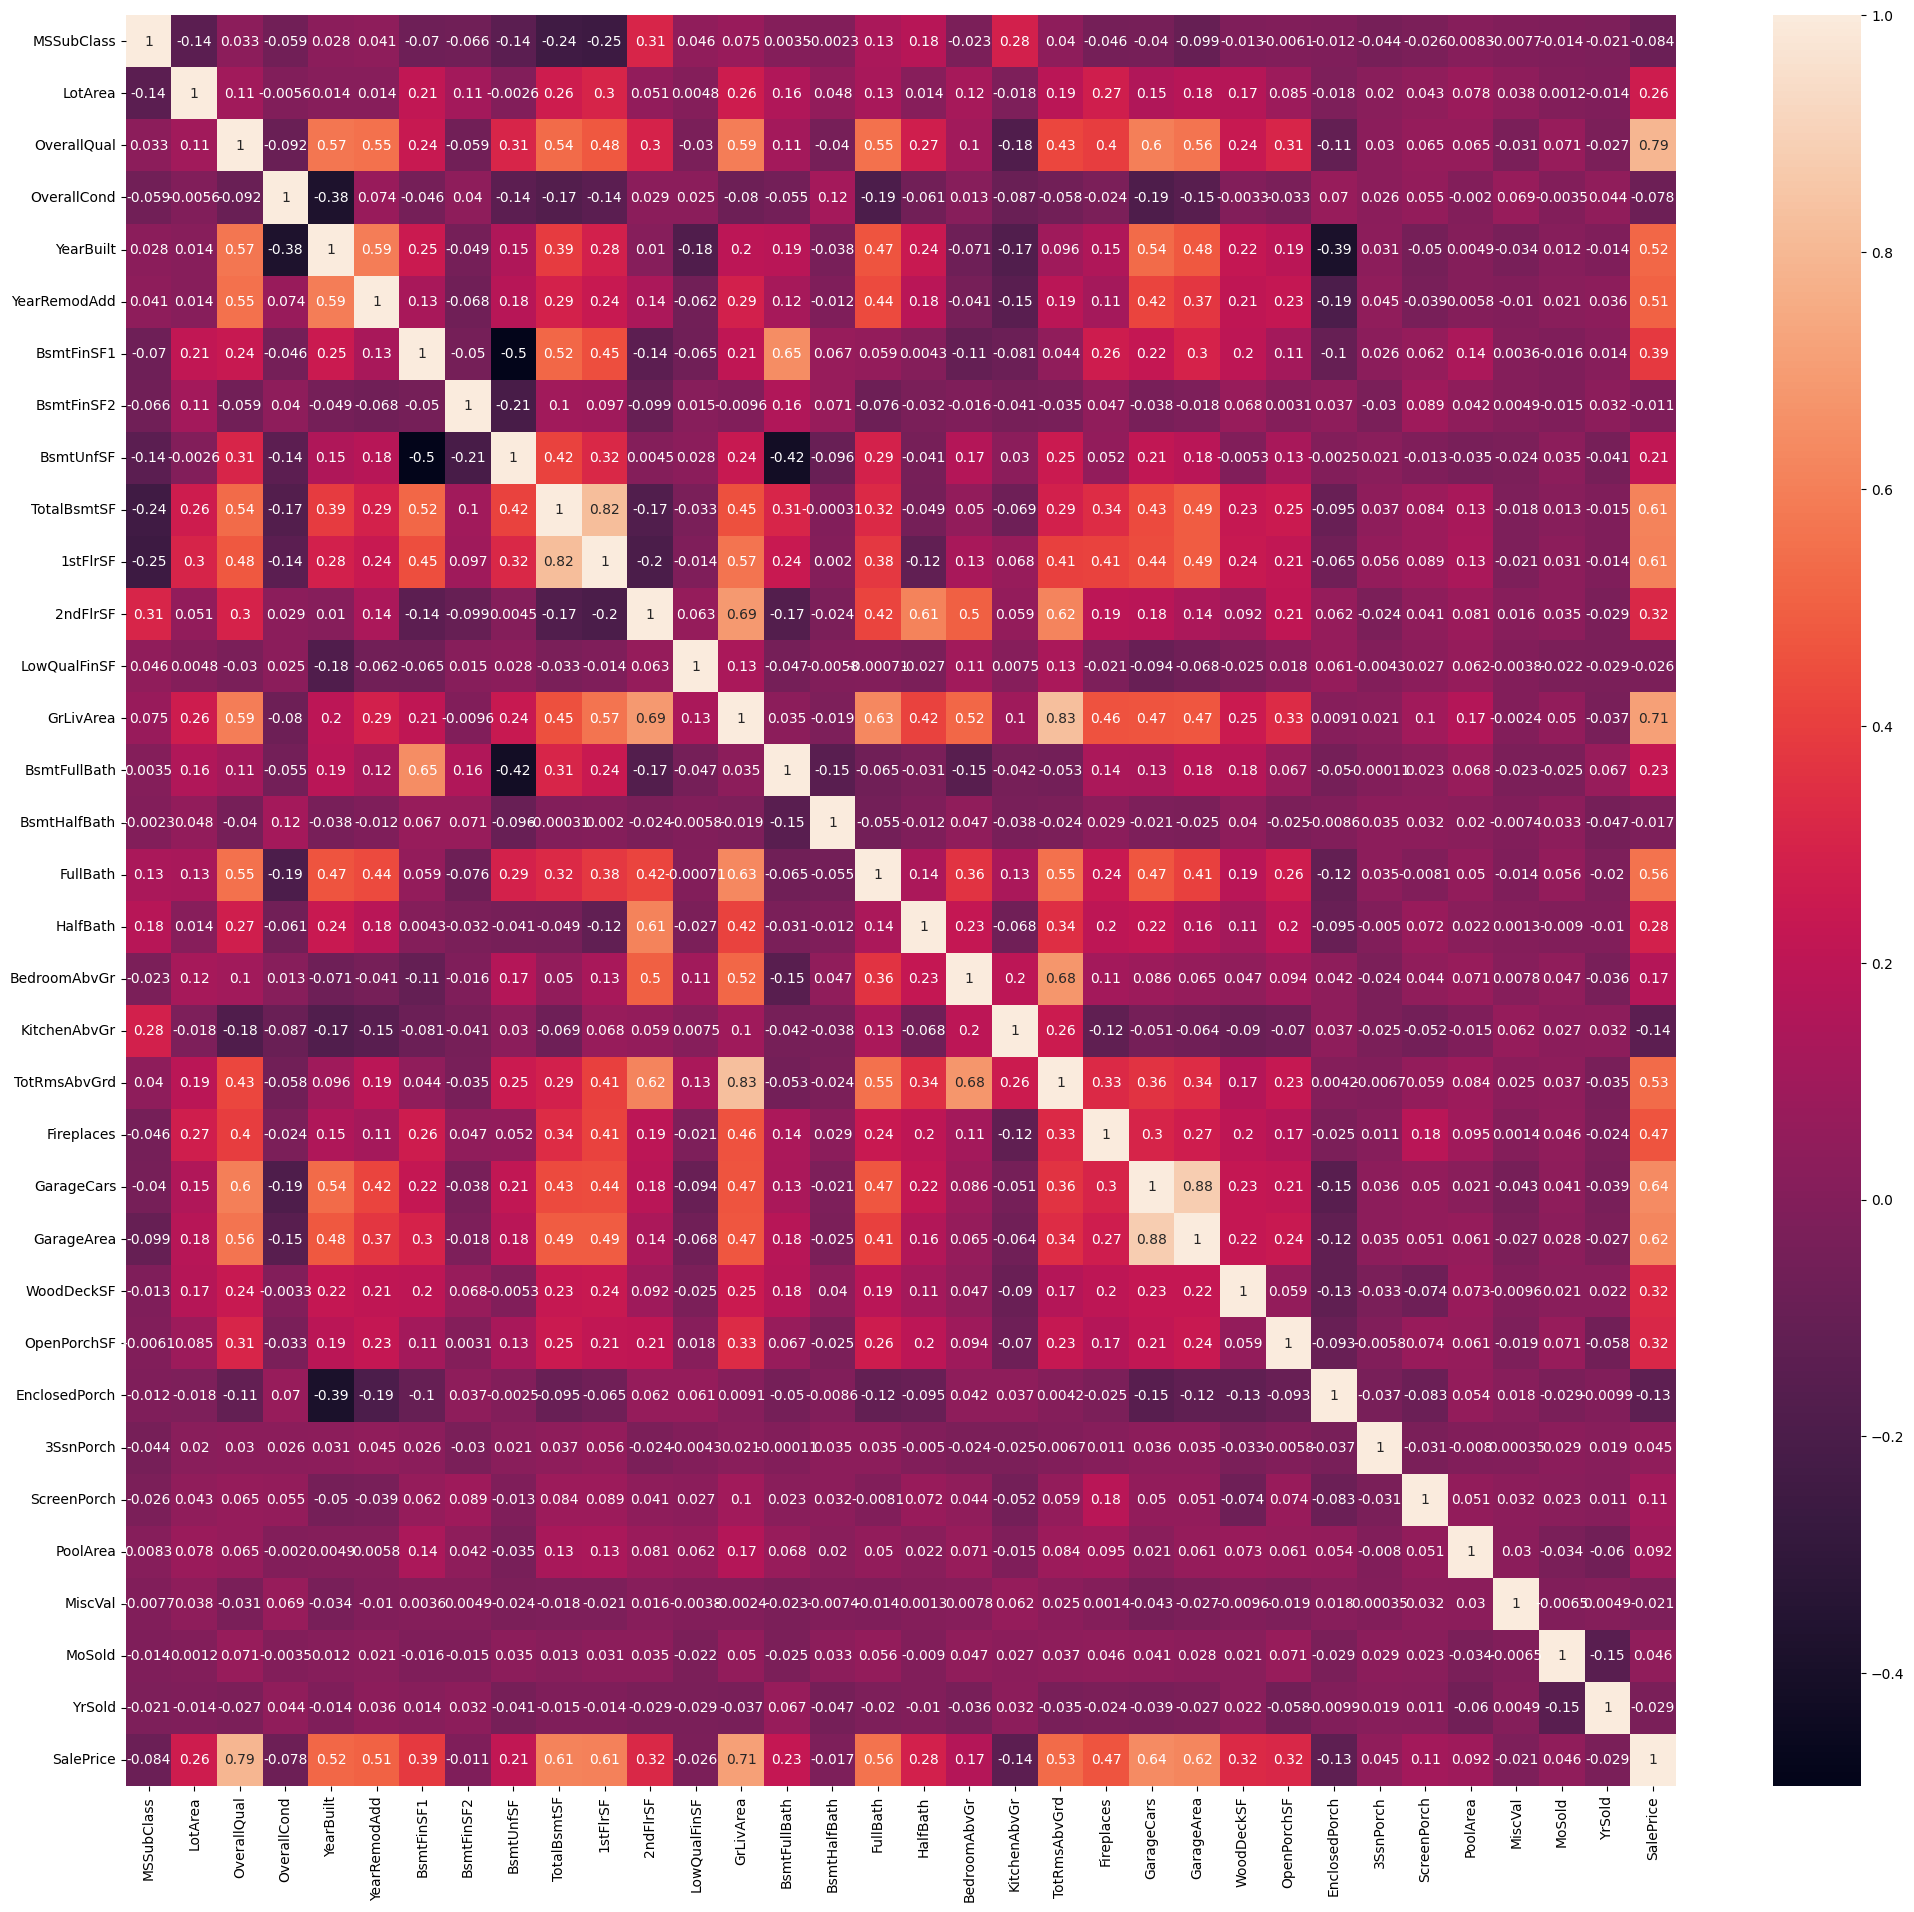

In [31]:
fig, ax = plt.subplots(figsize=(25, 23))
sns.heatmap(nums.corr(), annot=True)

По диаграмме делаем вывод, что наибольшая корреляция цены дома - с общим качеством дома и с жилой площадью. Немного меньше с ценой коррелирует размер гаража. Также, из диаграммы следует, что жилая площадь коррелирует с количеством комнат, а WoodDeckSF - с количеством каминов, что, в целом, логично.

Кроме того, видим, что на SalePrice также влияет размер гаража и количество машин, на которые он рассчитан.

Логично, что на количество спальных BedroomAbvGr влияет общее количество комнат TotRmsAbvGrd

✅ Найдите признаки с максимальным и минимальным абсолютным значением коэффициента корреляции Пирсона с предсказываемым значением. Изобразите на графиках зависимость найденных признаков от предсказываемого значения.

Предсказываемое значение - SalePrice. Меньше всего с ним коррелирует BsmtFinSF2 со значением -0.011. Наибольшая корреляция (0.79) цены - с OverallQual

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

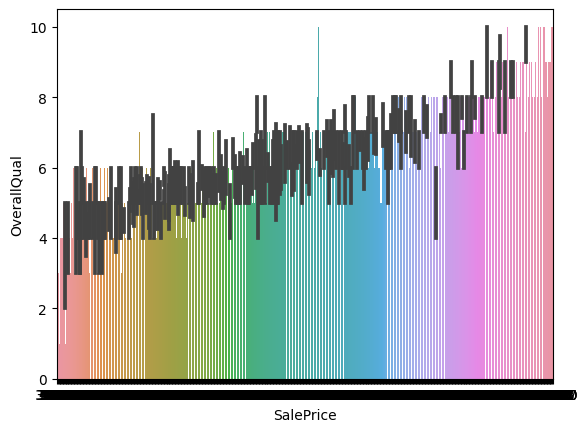

In [32]:
sns.barplot(data, x="SalePrice", y="OverallQual")

Видим почти линейное отношение, для 80% случаев можем сказать "Чем выше качество, тем выше цена". Но, встречаются и довольно агрессивные выбросы. Возможно, они связаны с необычными характеристиками домов, которые можно было бы пронаблюдать в других столбцах. Либо, владелец поставил неадекватную цену на свой дом: в этом случае выбросы лучше исключить из выборки. В любом случае, перед исключением выбросов нужно понять их природу, чтобы не ухудшить обобщающую способность модели

<Axes: xlabel='SalePrice', ylabel='BsmtFinSF2'>

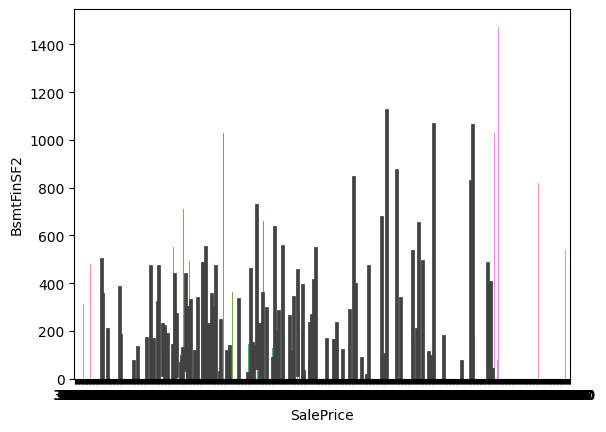

In [33]:
sns.barplot(data, x="SalePrice", y="BsmtFinSF2")

Видим разрозненные значения, логику распределения которых по данной гистограмме понять невозможно. Можно лишь заключить, что признак BsmtFinSF2 действительно почти не коррелирует с SalePrice. Несмотря на это, данный столбец может быть вовсе не лишним в базе (хотя по тепловой карте видно, что он мало коррелирует и с другими признаками). Возможно, именно этот признак объясняет природу выбросов. Можно посомтреть на веса, которые ему будет присваивать модель, чтобы понять, насколько этот столбец полезен

✅ Постройте гистограмму распределения предсказываемого значения. Для избавления от разницы в масштабах, а также "смещения" распределения переменной в сторону нормального, можно прологарифмировать ее (это обратимое преобразование, поэтому целевую переменную легко восстановить). 

Подсказка: воспользуйтесь `numpy.log1p`, чтобы сделать преобразование $y \to \ln\left(1 + y\right)$. Постройте гистограмму распределения от нового предсказываемого значения. Опишите наблюдения.

ВАЖНО: далее используйте в качестве предсказываемого значения вектор, который получился после логарифмирования.

In [34]:
logPredict = np.log1p(data['SalePrice'])
logPredict

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

C:\Users\kayle\AppData\Local\Temp\ipykernel_19616\1758579984.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(logPredict, hist=True, kde=False,


<Axes: xlabel='SalePrice'>

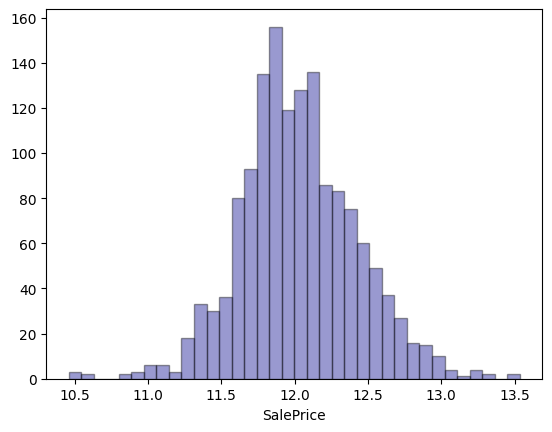

In [35]:
sns.distplot(logPredict, hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

Несмотря на логарифмирование переменной, гистограмма распределения напоминает нормальное распределение по Гаусу: большинство значений расположено близко к центру, а небольшая доля (1-5%) - отдалена от него. В целом, такое распределение говорит о почти идеальной нормализации выборки. Смущают только пробелы между основной выборкой и выбросами. Наверное, эти пробелы лучше было бы убрать

✅ Разбейте выборку на обучающую и тестовую в отношении 75:25. Зафиксируйте при разбиении значение `random_state` = 13. Не забывайте прологорифмировать целевую переменную (как в предыдущем задании)

In [36]:
X = data_coded.drop(['SalePrice'], axis=1)
y = np.log1p(data['SalePrice'])

In [37]:
np.random.seed(13)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

✅ Примените к данным 

- Линейную регрессию
- Lasso
- Ridge

Для каждого из методов подберите гиперпараметры с помощью кросс-валидации. Обучите алгоритмы с лучшими гиперпараметрами на обучающей выборке и оцените качество по метрикам 
- RMSE 
- MAE
- $R^2$

Опишите полученные результаты.

In [39]:
lin_regr = LinearRegression()
scores = cross_val_score(lin_regr, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
scores+1

array([0.89328889, 0.88939939, 0.85099137, 0.88351621, 0.87668154])

In [40]:
scores = cross_val_score(lin_regr, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
scores+1

array([0.9196598 , 0.92233374, 0.90350026, 0.91750993, 0.91268155])

Поскольку мы считаем негативые MAE и RMSE, их к их функционалу ошибки, для получения привычных значений, нужно прибавить единицу. 

In [41]:
scores = cross_val_score(lin_regr, X_train, y_train, scoring='r2', cv=5)
scores

array([0.92217188, 0.91690949, 0.85681348, 0.9122601 , 0.91690955])

Видим, что метрики качества достаточно высоки (примерно равны 0.91); возможно, применение регуляризаторов не сильно повлияет на результат, т.к. выборка, в целом, уже выглядит достаточно стабилизированной, и высокие значения качества, которые мы получили на старте, свидетельствуют об этом. Кроме того, видим, что корень средней квадратичной ошибки вывел ошибку немного больше, чем $R^2$ и $MAE$. Возможно, на это повлияли выбросы, которые мы наблюдали на гистограммах.

Применим к данным Lasso-нормализацию:

In [42]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    lasso = linear_model.Lasso(alpha=i)
    scores = cross_val_score(lasso, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    print('a =', i, 'scores =', scores+1)

a = 0.0001 scores = [0.89452395 0.89389529 0.86399495 0.89135689 0.87526276]
a = 0.001 scores = [0.89326122 0.88617321 0.87884157 0.8925719  0.87765444]
a = 0.01 scores = [0.88238738 0.864792   0.86152837 0.87732768 0.86512224]
a = 0.1 scores = [0.86036995 0.84297336 0.82877925 0.85541782 0.83177006]
a = 1 scores = [0.84823785 0.83950196 0.81046052 0.84979259 0.81876166]
a = 10 scores = [0.80579507 0.81018182 0.77534232 0.81722324 0.78664339]
a = 100 scores = [0.6764947  0.67942488 0.65846418 0.6858441  0.63559048]
a = 200 scores = [0.62568924 0.62872548 0.61171449 0.62915061 0.58696025]


Видим, что чем меньше данных мы нормализуем, тем выше качество обучения. Наверное, это связано со свойством $L^1$-нормализации "занулять" значения, близкие к нулю. В таком случае, Lasso-регуляризация могла обнулить параметры, которые выражали важные зависимости в данных

In [43]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    lasso = linear_model.Lasso(alpha=i)
    scores = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    print('a =', i, 'scores =', scores+1)

a = 0.0001 scores = [0.92124502 0.92436403 0.91082244 0.92159208 0.91273519]
a = 0.001 scores = [0.92100335 0.91783761 0.91600829 0.92489074 0.91325033]
a = 0.01 scores = [0.91301988 0.90737229 0.90414755 0.91456539 0.90597149]
a = 0.1 scores = [0.89882946 0.89257716 0.87886744 0.89758711 0.88317971]
a = 1 scores = [0.88671621 0.88645488 0.86506985 0.89241348 0.87211451]
a = 10 scores = [0.84894215 0.85169659 0.83881235 0.85639714 0.8418557 ]
a = 100 scores = [0.74430177 0.75219933 0.74523329 0.75736005 0.7211871 ]
a = 200 scores = [0.70214655 0.70950612 0.70288802 0.71357006 0.68283338]


Видим выводы, похожие на работу Lasso-нормализации с функционалом ошибок $MAE$: такие же высокие показатели качества с низкими гиперпараметром, и постепенное увеличение ошибки при росте гиперпараметра. Однако, $MAE$ немного выше оценивает данные с "маленькой" нормализацией, чем данным совсем без нормализации. Похожим образом вел себя и $RMSE$. Наверное, при обнулении малого количества выбросов качество выборки повышается. Это свидетельствует о том, что в выбросах помимо значений, улучшающих обобщающую способность, есть и лишние значения, которые "загрязняют" данные

In [44]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    lasso = linear_model.Lasso(alpha=i)
    scores = cross_val_score(lasso, X_train, y_train, scoring='r2', cv=5)
    print('a =', i, 'scores =', scores)

a = 0.0001 scores = [0.923963   0.92352742 0.88071402 0.92367435 0.91498664]
a = 0.001 scores = [0.92213151 0.91199135 0.90533562 0.92537198 0.91821543]
a = 0.01 scores = [0.90545794 0.87582299 0.87634806 0.9026896  0.90060247]
a = 0.1 scores = [0.8667476  0.83251225 0.81094329 0.86482523 0.84536724]
a = 1 scores = [0.8425857  0.82502505 0.76832526 0.85410218 0.82052868]
a = 10 scores = [0.74222681 0.75525603 0.67452184 0.78397298 0.75128205]
a = 100 scores = [0.2847135  0.30193476 0.24776794 0.36180038 0.27443826]
a = 200 scores = [0.04240502 0.06367486 0.02774166 0.11067348 0.06786541]


Функционал ошибок $R^2$ на высоких значениях регуляризации вывел огромное увеличение ошибки. Наверное, это связано со спецификой работы $R^2$ функционала. Такой резкий скачок в оценке качества мог бы ввести в заблуждение, если бы нельзя было сравнить его со значениями других функционалов ошибок. Поэтому, для объективной оценки лучше использовать по меньшей мере 3 функционала ошибки.

Применим к данным Ridge-регуляризацию:

In [45]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    ridge = linear_model.Ridge(alpha=i)
    scores = cross_val_score(ridge, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5)
    print('a =', i, 'scores =', scores+1)

a = 0.0001 scores = [0.8932902  0.88940153 0.85099764 0.88351963 0.87668169]
a = 0.001 scores = [0.89330175 0.88942066 0.85105384 0.88355031 0.87668298]
a = 0.01 scores = [0.89339393 0.88960238 0.85159395 0.8838455  0.87669422]
a = 0.1 scores = [0.89364643 0.89082928 0.85561351 0.88601828 0.8767399 ]
a = 1 scores = [0.89441772 0.89347903 0.86783396 0.89212874 0.87694909]
a = 10 scores = [0.89617597 0.89170168 0.87794826 0.89445985 0.87787251]
a = 100 scores = [0.89215006 0.88139983 0.87463795 0.8877496  0.87451561]
a = 200 scores = [0.88950955 0.8771666  0.8703332  0.88415723 0.87098614]


$L^2$ регуляризация слабо повлияла на качество данных, но при значении гиперпараметра = 1 показала небольшое уменьшение ошибки по сравнению с нерегуляризованными данными и по сравнению с более низкими / более высокими значениями гиперпараметра. При этом, в целом применение $Ridge$-регуляризации повлияло на качество обучения лучше, чем применение $Lasso$-регуляризации. Это значит, что $L^1$-нормализацию лучше применять только в некоторых специфических случаях, тогда как $L^2$-регуляризация при правильно подобранных гиперпараметрах способна улучшить качество обучения в большинстве случаев

In [46]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    ridge = linear_model.Ridge(alpha=i)
    scores = cross_val_score(ridge, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    print('a =', i, 'scores =', scores+1)

a = 0.0001 scores = [0.91966041 0.92233475 0.9035029  0.91751205 0.91268199]


a = 0.001 scores = [0.91966585 0.92234375 0.90352654 0.91753113 0.91268596]
a = 0.01 scores = [0.91971495 0.92243131 0.90375452 0.91770303 0.91272379]
a = 0.1 scores = [0.92002727 0.92301613 0.90538747 0.918614   0.9129511 ]
a = 1 scores = [0.92114077 0.92410507 0.91058669 0.92152241 0.91363396]
a = 10 scores = [0.92265561 0.92232565 0.91641087 0.9247655  0.9143874 ]
a = 100 scores = [0.91978963 0.91682105 0.9141034  0.92264271 0.91226911]
a = 200 scores = [0.91790484 0.9153341  0.9114954  0.92063738 0.91046576]


Видим вывод, похожий на работу Ridge с RMSE

In [47]:
lr = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 200]

for i in lr:
    ridge = linear_model.Ridge(alpha=i)
    scores = cross_val_score(ridge, X_train, y_train, scoring='r2', cv=5)
    print('a =', i, 'scores =', scores)

a = 0.0001 scores = [0.9221738  0.9169127  0.85682553 0.91226526 0.91690975]
a = 0.001 scores = [0.92219065 0.91694144 0.85693351 0.91231147 0.91691149]
a = 0.01 scores = [0.92232503 0.9172142  0.8579692  0.91275548 0.91692663]
a = 0.1 scores = [0.92269254 0.91904405 0.86555879 0.91598892 0.91698817]
a = 1 scores = [0.92380976 0.92292623 0.88735315 0.924755   0.9172697 ]
a = 10 scores = [0.92632621 0.92033275 0.90393454 0.92797197 0.91850671]
a = 100 scores = [0.92050184 0.90445521 0.89865287 0.91852172 0.91396516]
a = 200 scores = [0.91656146 0.89751286 0.89157313 0.91322313 0.90905734]


Вывод похож на вывод Ridge с RMSE, но заметим, что для функционала ошибки $R^2$ с высокими значениями гиперпараметра нормализации, применение Ridge, а не Lasso стало критическим. Наверное, Ridge-нормализация не обнулила важные для $R^2$ значения

✅ Постройте гистограммы значений весов для линейной регрессии, Lasso и Ridge. Опишите наблюдения, проанализируйте результаты.

In [48]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)
coef_lin_regr = pd.DataFrame(lin_regr.coef_, index = X.columns, columns=['lin_coef'])

In [49]:
lasso = linear_model.Lasso(alpha=0.0001)
lasso.fit(X_train, y_train)
coef_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns=['lasso_coef'])

In [50]:
ridge = linear_model.Ridge(alpha=1)
ridge.fit(X_train, y_train)
coef_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns=['ridge_coef'])

Гистограмма значений весов для линейной регрессии:

<Axes: ylabel='Count'>

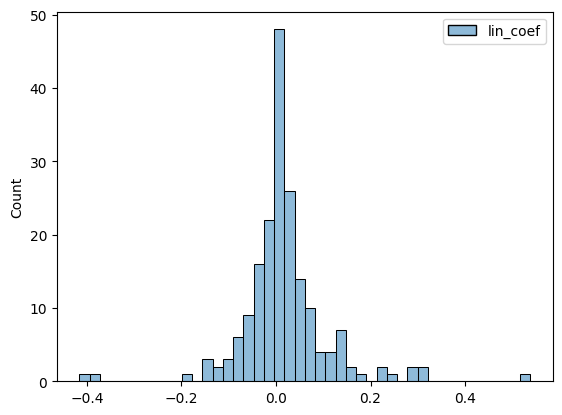

In [51]:
sns.histplot(data=coef_lin_regr)

Видим, что в целом гистограмма весов похожа на распределение признака SalePrice: многие значения имеют высокие веса, но некоторые значения практически не имеют весов. Вторые значения лучше убрать из выборки, чтобы увеличить качество обучения модели

Гистограмма значений весов при lasso-нормализации:

<Axes: ylabel='Count'>

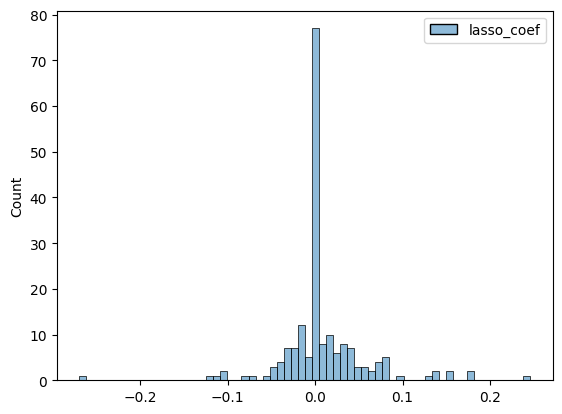

In [52]:
sns.histplot(data=coef_lasso)

Видим, что $L^1$-нормализация обострила разницу между выбросами и основной выборкой, что и сказалось на значениях $R^2$ функционала 

Гистограмма коэффициентов при ridge-регуляризации:

<Axes: ylabel='Count'>

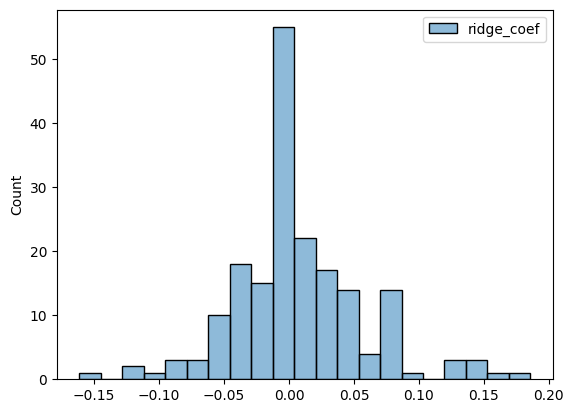

In [53]:
sns.histplot(data=coef_ridge)

Видим, что пропуски практически исчезли, а распределение весов максимально приблизилось к нормальному. Однако, даже при этой нормализации, выбросы остались. Наверное, нужно сократить разрыв между выбросами и основной выборкой